In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
from collections import Counter



In [ ]:
df_train=pd.read_csv('train_knn.txt',sep=",", header=None)

df_test=pd.read_csv('test_knn.txt',sep=",", header=None)

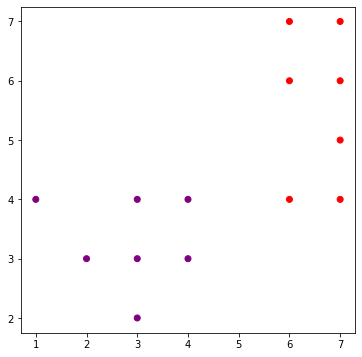

In [ ]:
points_x=[x for x in df_train[0]]
points_y=[y for y in df_train[1]]
labels=[label for label in df_train[2]]
colors = ['red','green','blue','purple']


fig = plt.figure(figsize=(6,6))
plt.scatter(points_x, points_y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))




plt.show()

In [ ]:
df_train

,0,1,2
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1
7,3,4,2
8,2,3,2
9,3,2,2


In [ ]:
neighbours=int(input("Neighbours?: "))

Neighbours?: 3


In [ ]:
class knnAlgorithm:

  def predict(self,dataset,prediction,neighbours):
      row=len(dataset)
      result=[]*row
      for x in range(row):
          col_1= dataset.loc[x, 0]
          col_2= dataset.loc[x, 1]
          result.append(math.sqrt(pow(prediction[0]-col_1, 2)+pow(prediction[1]-col_2, 2)))
      temp = result[:]
      index=[]
      result.sort()
      for count,value in enumerate(result):
          for idx,check in enumerate(temp):
              if(check == value and (idx not in index) and len(index)<3):
                  index.append(idx)
                  
          
      prediction=[]
      print(index)
      for i,x in enumerate(index):
          prediction.append(dataset.loc[x, 2])
          print("Distance ",i+1,": ",round(result[i],2),end=" ")
          print("Class: ",dataset.loc[x, 2])
      mode = Counter(prediction)
      mode.most_common(1)
   
      return mode.most_common(1)[0][0]
    











In [ ]:
model1=knnAlgorithm()

In [ ]:
xtest=df_test.values.tolist()
for predict in xtest:
    print("Test Point: ",predict,end=" ")
    prediction=model1.predict(df_train,predict,neighbours)
    print("Predicted Class: ",prediction)

Test Point:  [3, 7] [5, 7, 6]
Distance  1 :  3.0 Class:  1
Distance  2 :  3.0 Class:  2
Distance  3 :  3.16 Class:  1
Predicted Class:  1
Test Point:  [7, 7] [0, 4, 5]
Distance  1 :  0.0 Class:  1
Distance  2 :  1.0 Class:  1
Distance  3 :  1.0 Class:  1
Predicted Class:  1
Test Point:  [4, 3] [10, 11, 12]
Distance  1 :  0.0 Class:  2
Distance  2 :  1.0 Class:  2
Distance  3 :  1.0 Class:  2
Predicted Class:  2
Test Point:  [2, 8] [5, 7, 13]
Distance  1 :  4.12 Class:  1
Distance  2 :  4.12 Class:  2
Distance  3 :  4.12 Class:  2
Predicted Class:  2
Test Point:  [3, 5] [7, 12, 11]
Distance  1 :  1.0 Class:  2
Distance  2 :  1.41 Class:  2
Distance  3 :  2.0 Class:  2
Predicted Class:  2
Test Point:  [1, 2] [8, 9, 13]
Distance  1 :  1.41 Class:  2
Distance  2 :  2.0 Class:  2
Distance  3 :  2.0 Class:  2
Predicted Class:  2
Test Point:  [4, 8] [5, 6, 0]
Distance  1 :  2.24 Class:  1
Distance  2 :  2.83 Class:  1
Distance  3 :  3.16 Class:  1
Predicted Class:  1
Test Point:  [8, 3] [1, 2